## Correlation and Varince threshold

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [4]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df.head()
# This is Housing data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:>

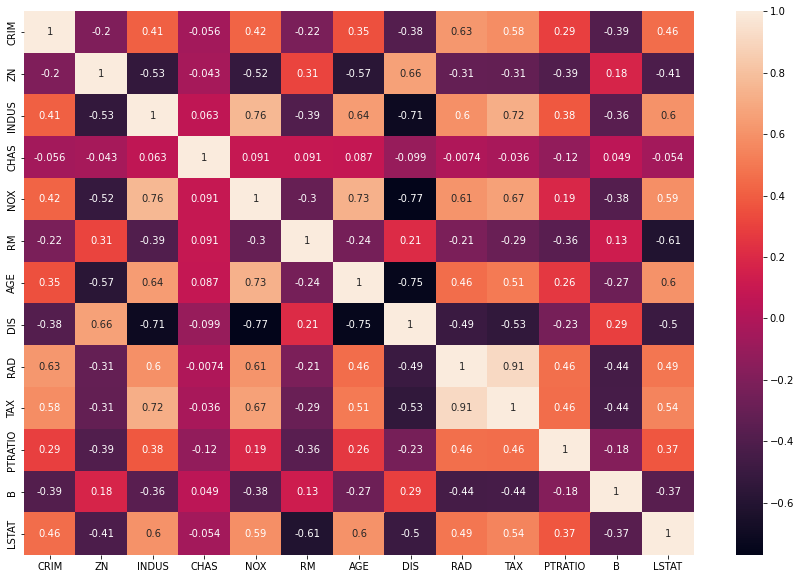

In [5]:
CorrMat = df.corr()

plt.figure(figsize = (15,10))

sns.heatmap(CorrMat, annot=True)

In [6]:
from sklearn.feature_selection import VarianceThreshold #Understand from sklearn documentation
df['MyNewCol'] = 100

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MyNewCol
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,100
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,100
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,100
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,100
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,100


In [7]:
VarThresh = VarianceThreshold(threshold=0)
VarThresh.fit(df)
VarThresh.get_support() 
#get_support means all these column qualify apart from 'MyNewCol' beacuse all values are same

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [8]:
#Change threshold value
VarThresh = VarianceThreshold(threshold=5)
VarThresh.fit(df)
VarThresh.get_support() 
# Below 'False' columns are not qualify now we can remove those false columns 


array([ True,  True,  True, False, False, False,  True, False,  True,
        True, False,  True,  True, False])

In [9]:
## Chi Square - Anova F-value

In [16]:
#iris data
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import numpy as np

iris = load_iris()

X = iris.data
y = iris.target

X = X.astype(int)

chi2_selector = SelectKBest(chi2,k=2) #'k' means how many features you want
kBest = chi2_selector.fit_transform(X, y)

chi2_scores = pd.DataFrame(list(zip(iris.feature_names, chi2_selector.scores_)), columns=['feature','score'])
chi2_scores


print('number of original features:', X.shape[1])
print('number of reduced features:', kBest.shape[1])

number of original features: 4
number of reduced features: 2


In [18]:
np.asarray(iris.feature_names)[chi2_selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [19]:
chi2_scores
#petal length and petal width are highest score that why we select both 

,feature,score
0,sepal length (cm),10.287129
1,sepal width (cm),5.022670
2,petal length (cm),133.068548
3,petal width (cm),74.279070


In [21]:
#iris data
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import numpy as np

iris = load_iris()

X = iris.data
y = iris.target

X = X.astype(int)

chi2_selector = SelectPercentile(f_classif) 
kBest = chi2_selector.fit_transform(X, y)

chi2_scores = pd.DataFrame(list(zip(iris.feature_names, chi2_selector.scores_)), columns=['feature','score'])
chi2_scores


print('number of original features:', X.shape[1])
print('number of reduced features:', kBest.shape[1])

number of original features: 4
number of reduced features: 1


In [22]:
np.asarray(iris.feature_names)[chi2_selector.get_support()]

array(['petal length (cm)'], dtype='<U17')

In [23]:
chi2_scores

,feature,score
0,sepal length (cm),81.197151
1,sepal width (cm),33.715004
2,petal length (cm),1160.011597
3,petal width (cm),385.483002


In [24]:
#iris data
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import numpy as np

iris = load_iris()

X = iris.data
y = iris.target

X = X.astype(int)

chi2_selector = SelectPercentile(chi2) 
kBest = chi2_selector.fit_transform(X, y)

chi2_scores = pd.DataFrame(list(zip(iris.feature_names, chi2_selector.scores_)), columns=['feature','score'])
chi2_scores


print('number of original features:', X.shape[1])
print('number of reduced features:', kBest.shape[1])

number of original features: 4
number of reduced features: 1


In [25]:
np.asarray(iris.feature_names)[chi2_selector.get_support()]

array(['petal length (cm)'], dtype='<U17')

In [28]:
chi2_scores

,feature,score
0,sepal length (cm),10.287129
1,sepal width (cm),5.022670
2,petal length (cm),133.068548
3,petal width (cm),74.279070


## Information Gain

In [30]:
from sklearn.feature_selection import mutual_info_classif
data = pd.read_csv('insurance_data.csv')
data

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [ ]:
features = data[['age','bmi','charges']] #continous
target = data[['region']] #Categorical

In [ ]:
feature_scores = mutual_info_classif(features, target, random_state=0)
feature_score

## feature selection by Wrapper and Filter Method

In [31]:
!pip3 install mlxtend

In [32]:
#backward, forward, bi-directional all these happen with the help of "SequentialFeatureSelector"
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [33]:
from sklearn.neighbors import KNeighborsClassifier #Here we can import any model
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#parameters to understand

sfs = SFS(knn,
         k_features=3,
         forward=True,
         floating=False,
         scoring='accuracy',
         cv=0,
         n_jobs=-1)

feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
sfs = sfs.fit(X,y,custom_feature_names=feature_names)

In [35]:
import pandas as pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)",[0.96],0.96,"(petal width,)",NaN,0.0,NaN
2,"(2, 3)",[0.9733333333333334],0.973333,"(petal length, petal width)",NaN,0.0,NaN
3,"(1, 2, 3)",[0.9733333333333334],0.973333,"(sepal width, petal length, petal width)",NaN,0.0,NaN


In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#parameters to understand

sfs = SFS(knn,
         k_features=2,
         forward=False, #Now it goes backword direction
         floating=False,
         scoring='accuracy',
         cv=0,
         n_jobs=-1)

feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
sfs = sfs.fit(X,y,custom_feature_names=feature_names)

In [39]:
import pandas as pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)",[0.96],0.96,"(sepal length, sepal width, petal length, peta...",NaN,0.0,NaN
3,"(1, 2, 3)",[0.9733333333333334],0.973333,"(sepal width, petal length, petal width)",NaN,0.0,NaN
2,"(2, 3)",[0.9733333333333334],0.973333,"(petal length, petal width)",NaN,0.0,NaN


In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#parameters to understand

sfs = SFS(knn,
         k_features=2,
         forward=False, #Now it goes backword direction
         floating=False,
         scoring='accuracy',
         cv=2,
         n_jobs=-1)

feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
sfs = sfs.fit(X,y,custom_feature_names=feature_names)

In [42]:
import pandas as pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.96, 0.9466666666666667]",0.953333,"(sepal length, sepal width, petal length, peta...",0.028684,0.006667,0.006667
3,"(1, 2, 3)","[0.9733333333333334, 0.9466666666666667]",0.96,"(sepal width, petal length, petal width)",0.057369,0.013333,0.013333
2,"(1, 3)","[0.9733333333333334, 0.9333333333333333]",0.953333,"(sepal width, petal width)",0.086053,0.02,0.02


In [43]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#parameters to understand

sfs = SFS(knn,
         k_features=2,
         forward=False, #Now it goes backword direction
         floating=True, #Now it's do bi-directional, some it's add and some times it removes
         scoring='accuracy',
         cv=2,
         n_jobs=-1)

feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
sfs = sfs.fit(X,y,custom_feature_names=feature_names)

In [44]:
import pandas as pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.96, 0.9466666666666667]",0.953333,"(sepal length, sepal width, petal length, peta...",0.028684,0.006667,0.006667
3,"(1, 2, 3)","[0.9733333333333334, 0.9466666666666667]",0.96,"(sepal width, petal length, petal width)",0.057369,0.013333,0.013333
2,"(1, 3)","[0.9733333333333334, 0.9333333333333333]",0.953333,"(sepal width, petal width)",0.086053,0.02,0.02


## Recursive Feature Elimination

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [46]:
# It is similar to backword
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()

# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['Price'] = pd.Series(boston_pd_target)
 
# input
X = boston_pd.iloc[:, :-1]
 
#output
Y = boston_pd.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
    test_size = 0.20)

 
print(boston_pd.head())

X, y = x_train, y_train

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


lin_reg = LinearRegression()

rfe_mod = RFE(lin_reg) 
myvalues=rfe_mod.fit(X,y) 
myvalues.support_
myvalues.ranking_ 

print("Num Features: %s" % (myvalues.n_features_))
print("Selected Features: %s" % (myvalues.support_))
print("Feature Ranking: %s" % (myvalues.ranking_))  

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
Num Features: 6
Selected Features: [False False False  True  True  True False  True False False  True False
  True]
Feature Ranking: [2 4 8 1 1 1 5 1 3 6 1 7 1]


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()

# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['Price'] = pd.Series(boston_pd_target)
 
# input
X = boston_pd.iloc[:, :-1]
 
#output
Y = boston_pd.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
    test_size = 0.20)

 
print(boston_pd.head())

X, y = x_train, y_train

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


lin_reg = LinearRegression()

rfe_mod = RFECV(lin_reg, cv=2) 
myvalues=rfe_mod.fit(X,y) 
myvalues.support_
myvalues.ranking_ 

print("Num Features: %s" % (myvalues.n_features_))
print("Selected Features: %s" % (myvalues.support_))
print("Feature Ranking: %s" % (myvalues.ranking_))  

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
Num Features: 13
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1]


## Using Models to select features-Embedded Methods

In [49]:

from sklearn.linear_model import Lasso
 

lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 

mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("MSE on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

MSE on test set 26.56481997400192
    Columns  Coefficient Estimate
0      CRIM             -0.073186
1        ZN              0.048856
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.630129
6       AGE              0.022254
7       DIS             -0.665207
8       RAD              0.335076
9       TAX             -0.018476
10  PTRATIO             -0.649473
11        B              0.011201
12    LSTAT             -0.776679


In [ ]:
# Explore ridge and elastic net - Assignment 

## Using Random Forest to Select features

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100,random_state=42)
rf.fit(x_train, y_train)
importances = rf.feature_importances_

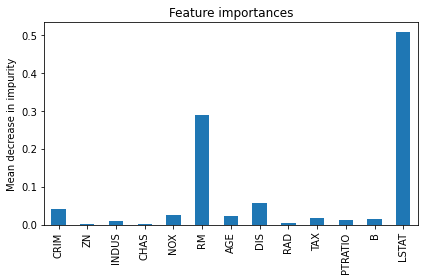

In [51]:
forest_importances = pd.Series(importances, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [52]:
forest_importances

CRIM       0.041042
ZN         0.001108
INDUS      0.009069
CHAS       0.000664
NOX        0.024194
RM         0.289671
AGE        0.021485
DIS        0.057432
RAD        0.004329
TAX        0.017104
PTRATIO    0.013049
B          0.013447
LSTAT      0.507406
dtype: float64